In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# https://github.com/thu-vu92/python-dashboard-panel/blob/main/Interactive_dashboard.ipynb

In [2]:
# pd.set_option('display.max_rows', 500)

In [3]:
# Read file
# D:/OneDrive - ubd.edu.bn/Dataset/
# C:/Users/Muaz/OneDrive - ubd.edu.bn/Dataset/
# C:/Users/Simulation/muaz/MCMC/
df = pd.read_csv(r'C:/Users/Simulation/muaz/MCMC/'\
                 r'Population statistics for Seoul UTF-8/'\
                     r'raw sample.csv')
df.head()

fam_id  sex  age  city_code  gu_code  age_type  fam_type  ws  ws_means  \
0  1502000011    1   67         11       80         4  10203241   2         2   
1  1502000011    2   61         11       80         3  10203241   0         0   
2  1502000011    2   26         11       80         3  10203241   2         6   
3  1502000012    2   50         11      120         3  10213240   2         6   
4  1502000012    2   23         11      120         3  10213240   1         1   

   ws_time  ws_out  
0       20       0  
1        0       0  
2       60       0  
3       40       0  
4       10       0

# Add 'Occupation' Variable

Identify occupation based on the age group
<br>0-6: pre-school
<br>7-18: school
<br>19-64: work
<br>over 65: retired

In [4]:
df['occupation'] = ""

# Pre-school
pre_school_pop = df.index[(df['age']>=0) & (df['age']<=6)].tolist()
df.loc[pre_school_pop, 'occupation'] = "pre-school"

# School
school_pop = df.index[(df['age']>=7) & (df['age']<=18)].tolist()
df.loc[school_pop, 'occupation'] = "school"

# Work
work_pop = df.index[(df['age']>=19) & (df['age']<=64)].tolist()
df.loc[work_pop, 'occupation'] = "work"

# Retired
retired_pop = df.index[df['age']>=65].tolist()
df.loc[retired_pop, 'occupation'] = "retired"

In [5]:
df.head()

fam_id  sex  age  city_code  gu_code  age_type  fam_type  ws  ws_means  \
0  1502000011    1   67         11       80         4  10203241   2         2   
1  1502000011    2   61         11       80         3  10203241   0         0   
2  1502000011    2   26         11       80         3  10203241   2         6   
3  1502000012    2   50         11      120         3  10213240   2         6   
4  1502000012    2   23         11      120         3  10213240   1         1   

   ws_time  ws_out occupation  
0       20       0    retired  
1        0       0       work  
2       60       0       work  
3       40       0       work  
4       10       0       work

# Add 'Household Size' variable

In [6]:
hh_size = df['fam_id'].value_counts()
hh_size_dict = hh_size.to_dict()
hh_size_list = []
for idx in tqdm(range(0, len(df))):  # len(df_sample)
  get_idx = df['fam_id'][idx]
  # print(get_idx)
  hh_size_list.append(hh_size_dict.get(get_idx))

# print(len(hh_size_list))
# print(hh_size_list)

df['hh_size'] = hh_size_list

100%|██████████| 153821/153821 [00:00<00:00, 202288.81it/s]


In [7]:
df.head()

fam_id  sex  age  city_code  gu_code  age_type  fam_type  ws  ws_means  \
0  1502000011    1   67         11       80         4  10203241   2         2   
1  1502000011    2   61         11       80         3  10203241   0         0   
2  1502000011    2   26         11       80         3  10203241   2         6   
3  1502000012    2   50         11      120         3  10213240   2         6   
4  1502000012    2   23         11      120         3  10213240   1         1   

   ws_time  ws_out occupation  hh_size  
0       20       0    retired        3  
1        0       0       work        3  
2       60       0       work        3  
3       40       0       work        3  
4       10       0       work        3

# Distribution Plots

<AxesSubplot:xlabel='hh_size', ylabel='Count'>

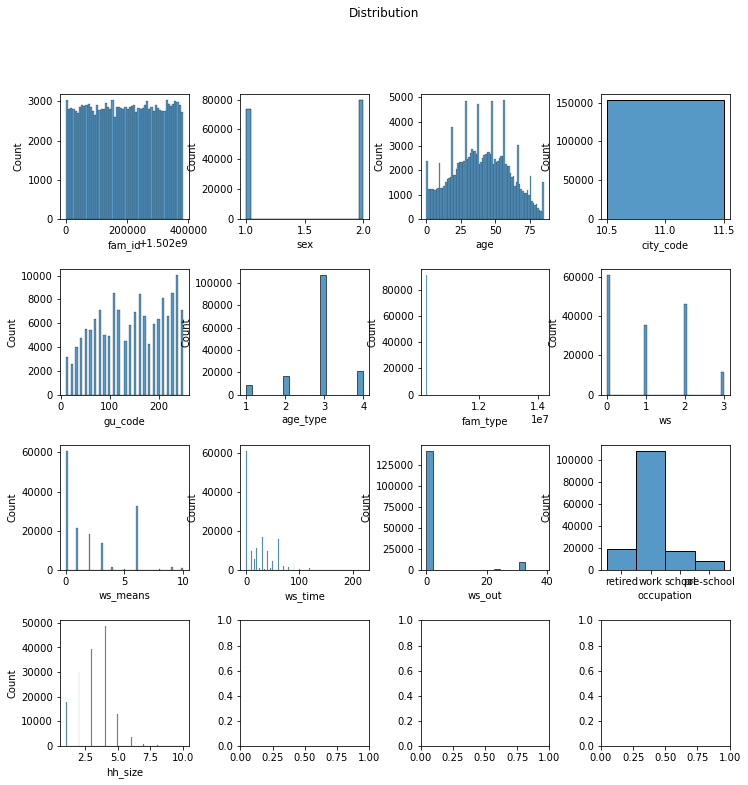

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Distribution')

sns.histplot(ax=axes[0, 0], data=df['fam_id'])
sns.histplot(ax=axes[0, 1], data=df['sex'])
sns.histplot(ax=axes[0, 2], data=df['age'])
sns.histplot(ax=axes[0, 3], data=df['city_code'])
sns.histplot(ax=axes[1, 0], data=df['gu_code'])
sns.histplot(ax=axes[1, 1], data=df['age_type'])
sns.histplot(ax=axes[1, 2], data=df['fam_type'])
sns.histplot(ax=axes[1, 3], data=df['ws'])
sns.histplot(ax=axes[2, 0], data=df['ws_means'])
sns.histplot(ax=axes[2, 1], data=df['ws_time'])
sns.histplot(ax=axes[2, 2], data=df['ws_out'])
sns.histplot(ax=axes[2, 3], data=df['occupation'])
sns.histplot(ax=axes[3, 0], data=df['hh_size'])


# Convert to a Full Conditional Probability Table

age or age_group            | sex, fam_type, occupation, gu_code, ws
<br>sex                     | age, fam_type, occupation, gu_code, ws
<br>fam_type or hh_size     | age, sex, occupation, gu_code, ws
<br>occupation              | age, sex, fam_type, gu_code, ws
<br>gu_code                 | age, sex, fam_type, occupation, ws
<br>ws                      | age, sex, fam_type, occupation, gu_code
<br> https://stackoverflow.com/questions/33468976/pandas-conditional-probability-of-a-given-specific-b
<br> https://towardsdatascience.com/conditional-probability-with-python-concepts-tables-code-c23ffe65d110
<br> https://www.youtube.com/watch?v=ER3DDBFzH2g&t=256s
<br> https://jaketae.github.io/study/gibbs-sampling/
<br> https://people.duke.edu/~ccc14/sta-663/MCMC.html
<br> https://datascienceschool.net/03%20machine%20learning/19.01%20%EB%AA%AC%ED%85%8C%EC%B9%B4%EB%A5%BC%EB%A1%9C%20%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88%20%EB%B6%84%EC%84%9D.html
<br> https://datagy.io/pandas-crosstab/

In [ ]:
df.info()

In [ ]:
# Try age_type, sex, hh_size, occupation first

df_age_type = pd.crosstab(df['age_type'],
                        [df['sex'], df['hh_size'], df['occupation']],
                        margins=True)      
df_age_type

In [ ]:
df_age_type = pd.crosstab(df['age_type'],
                        [df['sex'], df['hh_size'], df['occupation']],
                        margins=True, normalize='columns')      
df_age_type

In [ ]:
# Extracting an element from the crosstab
df_age_type.loc[df_age_type.index.get_level_values('age_type') == 3,
                (df_age_type.columns.get_level_values('sex') == 1) &
                (df_age_type.columns.get_level_values('hh_size') == 2) &
                (df_age_type.columns.get_level_values('occupation') == 'work')
                ].values[0][0]

In [ ]:
df_sex = pd.crosstab(df['sex'],
                        [df['age_type'], df['hh_size'], df['occupation']],
                        margins=True)      
df_sex

In [ ]:
df_hh_size = pd.crosstab(df['hh_size'],
                        [df['age_type'], df['sex'], df['occupation']],
                        margins=True)   
df_hh_size

In [ ]:
df_occupation = pd.crosstab(df['occupation'],
                        [df['age_type'], df['sex'], df['hh_size']],
                        margins=True)  
df_occupation

# Gibbs Sampling

In [9]:
# pd.set_option('display.max_rows', 100)

In [10]:
df1 = df[['fam_type', 'sex', 'age_type', 'gu_code', 'ws', 'occupation']]
df1

fam_type  sex  age_type  gu_code  ws occupation
0       10203241    1         4       80   2    retired
1       10203241    2         3       80   0       work
2       10203241    2         3       80   2       work
3       10213240    2         3      120   2       work
4       10213240    2         3      120   1       work
...          ...  ...       ...      ...  ..        ...
153816  10203240    1         3      110   0       work
153817  10203140    1         3       20   2       work
153818  10203142    1         4      110   0    retired
153819  10203142    2         4      110   0    retired
153820  10203142    1         3      110   0       work

[153821 rows x 6 columns]

In [11]:
def create_variable_attribute(var):
    keys = []
    for i in range(var):
        keys.append('x'+str(i))
    return keys

x = ['fam_type', 'sex', 'age_type', 'gu_code', 'ws', 'occupation']

keys = create_variable_attribute(len(x))
keys 

['x0', 'x1', 'x2', 'x3', 'x4', 'x5']

In [12]:
idx_x = list(range(len(x))) 
idx_x

[0, 1, 2, 3, 4, 5]

In [13]:
X_init = df1[x].sample().values.tolist()[0]
X_init

[10203340, 2, 3, 90, 0, 'work']

In [ ]:
pop_target = 1000672
burn_period = 500
n_corr = 2 # sampling frequency to avoid correlation
X_sampled = []
X_sampled.append(X_init)
X_sampled_final = []

cnt = 0
agent_idx = 0

# for agent_idx in range(1, pop_target):
while len(X_sampled_final) < pop_target+burn_period:
    # print('\nAgent ID: ',len(X_sampled_final)) # \n agent_idx
    X_prev_agent = X_sampled[-1]
    X_prev_agent = dict(zip(keys, X_prev_agent))
    X_new_agent = dict.fromkeys(keys)
    # print('X_prev_agent: '+str(X_prev_agent))
    # print('X_new_agent: '+str(X_new_agent))
    
    for att_idx in range(len(x)):
        # return value that are not the same as the listed value
        cond_list = list(set(idx_x)-set([att_idx]))
        # print('\nAttribute: '+str(att_idx)+', Conditional on: '+str(cond_list))
        cond_order = []
        
        # check each attribute in X_new_agent dictionary
        for cond_idx in range(len(cond_list)):
            # print('Check conditional attribute in X_new_agent ('+str(cond_list[cond_idx])+')')
            if not X_new_agent.get('x'+str(cond_list[cond_idx])):
                # print('Not available in Xi, so use attribute from Xi-1')
                # If empty use the attribute from the previous agent (X_prev_agent)
                cond_order.append(X_prev_agent.get('x'+str(cond_list[cond_idx])))
                # print('conditional order: ',cond_order)
            else: # if the given attribute is not found in the list
                # print('Available in Xi')
                # print(X_new_agent.get('x'+str(cond_list[cond_idx])))
                cond_order.append(X_new_agent.get('x'+str(cond_list[cond_idx])))
                # print('conditional order: ',cond_order)
        
        x_sampled = df1[x[att_idx]].loc[(df1[x[cond_list[0]]] == cond_order[0]) & (df1[x[cond_list[1]]] == cond_order[1])
                                       & (df1[x[cond_list[2]]] == cond_order[2]) & (df1[x[cond_list[3]]] == cond_order[3])
                                       & (df1[x[cond_list[4]]] == cond_order[4])].sample().values.tolist()[0] #  & (df1[x[cond_list[5]]] == cond_order[5])
        
        X_new_agent['x'+str(att_idx)] = x_sampled
        # print('Sampled new attribute to an agent: ', X_new_agent)
        
    X_sampled.append([val for key, val in X_new_agent.items()])
    # print(X_sampled)
    cnt += 1
    agent_idx += 1
    X_sampled.pop(0)
    
    # To avoid the correlation between the consecutive draws, certain number of draws between two recorded draws are skipped.
    if cnt == n_corr:
        X_sampled_final.append([val for key, val in X_new_agent.items()])
        cnt = 0
        print('\nAgent ID#'+str(len(X_sampled_final))+' : '+str(X_new_agent))
        # print('True Samples: ',X_sampled_final)


Agent ID#1 : {'x0': 10203240, 'x1': 1, 'x2': 3, 'x3': 230, 'x4': 1, 'x5': 'work'}

Agent ID#2 : {'x0': 11213240, 'x1': 2, 'x2': 3, 'x3': 130, 'x4': 2, 'x5': 'work'}

Agent ID#3 : {'x0': 10203340, 'x1': 1, 'x2': 3, 'x3': 220, 'x4': 0, 'x5': 'work'}

Agent ID#4 : {'x0': 10203440, 'x1': 2, 'x2': 3, 'x3': 250, 'x4': 0, 'x5': 'work'}

Agent ID#5 : {'x0': 10203140, 'x1': 1, 'x2': 3, 'x3': 240, 'x4': 2, 'x5': 'work'}

Agent ID#6 : {'x0': 10203441, 'x1': 1, 'x2': 3, 'x3': 170, 'x4': 0, 'x5': 'work'}

Agent ID#7 : {'x0': 11203240, 'x1': 2, 'x2': 3, 'x3': 80, 'x4': 0, 'x5': 'work'}

Agent ID#8 : {'x0': 10203240, 'x1': 2, 'x2': 3, 'x3': 120, 'x4': 0, 'x5': 'work'}

Agent ID#9 : {'x0': 10203240, 'x1': 2, 'x2': 3, 'x3': 140, 'x4': 2, 'x5': 'work'}

Agent ID#10 : {'x0': 10203340, 'x1': 2, 'x2': 3, 'x3': 190, 'x4': 1, 'x5': 'work'}

Agent ID#11 : {'x0': 10203240, 'x1': 2, 'x2': 3, 'x3': 60, 'x4': 2, 'x5': 'work'}

Agent ID#12 : {'x0': 10203340, 'x1': 1, 'x2': 3, 'x3': 240, 'x4': 1, 'x5': 'work'}

Ag

In [ ]:
print(len(X_sampled))
# print(X_sampled)

In [ ]:
print(len(X_sampled_final))
# print(X_sampled_final)

In [ ]:
pop_sampled = X_sampled_final[burn_period:]
len(pop_sampled)

In [ ]:
df_sampled = pd.DataFrame(pop_sampled,columns=x)
df_sampled

In [ ]:
df_sampled.to_csv(r'C:/Users/Muaz/OneDrive - ubd.edu.bn/Dataset/'\
                     r'Population statistics for Seoul UTF-8/'\
                     r'MCMC_synpop.csv')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Distribution')
# ['fam_type', 'sex', 'age_type', 'gu_code', 'ws', 'occupation']

sns.histplot(ax=axes[0, 0], data=df['fam_type'])
sns.histplot(ax=axes[0, 1], data=df['sex'])
sns.histplot(ax=axes[0, 2], data=df['age_type'])
sns.histplot(ax=axes[1, 0], data=df['gu_code'])
sns.histplot(ax=axes[1, 1], data=df['ws'])
sns.histplot(ax=axes[1, 2], data=df['occupation'])

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Distribution')
# ['fam_type', 'sex', 'age_type', 'gu_code', 'ws', 'occupation']

sns.histplot(ax=axes[0, 0], data=df_sampled['fam_type'])
sns.histplot(ax=axes[0, 1], data=df_sampled['sex'])
sns.histplot(ax=axes[0, 2], data=df_sampled['age_type'])
sns.histplot(ax=axes[1, 0], data=df_sampled['gu_code'])
sns.histplot(ax=axes[1, 1], data=df_sampled['ws'])
sns.histplot(ax=axes[1, 2], data=df_sampled['occupation'])

In [ ]:
from itertools import product
import numpy as np
import scipy.stats as ss

In [ ]:
df_sampled.columns

In [ ]:
df_sampled.dtypes

In [ ]:
## Let us split this list into two parts
cat_var1 = x
cat_var2 = x

## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
cat_var_prod

In [ ]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_sampled[i[0]], df_sampled[i[1]])))[1]))

There exists a relationship between two variables if p value ≤ 0.05. So from the above table we can say that there is definitely some association between Dependents and Gender, Dependents and Married, Married and Gender. For rest of the pairs there exists no relationship

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')